# Regressão Linear

Nessa aula, iremos tratar dos seguintes conteúdos:
- Introdução a Regressões
- Regressão Linear Simples
- Métricas de Regressões
- Regressão Polinomial
- Regressão Linear Múltipla

## Introdução a Regressões

A regressão tem por objetivo explicar a associação de variáveis quantitativas, sendo sempre uma delas a variável do objetivo do estudo, aqui chamada de **dependente**, pois veremos que o seu valor dependerá de outras informações, chamadas de **variáveis independentes**, das quais ao menos uma precisa ser também quantitativa.

<img src = "../imgs/reg_lin_pontos.png" width = "30%"></img>

O intuito do modelo de regressão linear é definirmos uma reta que melhor se ajusta aos dados.

<img src = "../imgs/reg_lin_explicacao.png" width = "30%"></img>

A seguir veremos casos de Regressão Linear Simples, Múltipla e Polinomial:

## Regressão Linear Simples

Na regressão linear simples, temos o modelo como: $Y \approx \beta_0 + \beta_1 X$

- $Y$ é a variável dependente, pois é escrita em função de variável $X$
- $X$ é a variável independente, pois a partir dela chegaremos em valores estimados de $Y$, também denotado por $\hat{Y}$
- $\beta_0$ é chamado de **intercepto** pois define o valor que intercepta o eixo $y$ quando $x = 0$. Muitas vezes pode ser interpretado como o valor mínimo associado ao determinado experimento.
- $\beta_1$ é chamado de **coeficiente angular**, ou ainda, **coeficiente de proporcionalidade**, pois define a qual taxa as variáveis $X$ e $Y$ se relacionam.

A questão agora é, como encontramos os valores de $\tilde{\beta}$?

## Métodos de Estimação de Parâmetros
### Propriedades esperadas

<img src = "../imgs/vies.png" width = "50%"></img>

- A: não-viesado, pouco acurado e baixa precisão
- B: viesado, pouco acurado e baixa precisão
- C: não-viesado, muito acurada e boa precisão
- D: viesada, pouco acurada e alta precisão

Queremos sempre um BLUE - Best Linear unbiased estimator

### OLS ou Mínimos Quadrados Ordinários
Um dos procedimentos mais usados para obter estimadores é aquele que se baseia no princípio dos mínimos quadrados, introduzido por Gauss em 1794, mas que primeiro apareceu com esse nome no apêndice do tratado de Legendre, Nouvelles Méthodes pour la Determination des Orbites des Comètes, publicado em Paris em 1806. Gauss somente viria a publicar seus resultados em 1809, em Hamburgo. Ambos utilizaram o princípio em conexão com problemas de Astronomia e Física.

Um engenheiro está estudando a resistência Y de uma fibra em função de seu diâmetro X e notou que as variáveis são aproximadamente proporcionais, isto é, elas obedecem à relação

$$Y  = \beta_0 + \beta_1X$$

em que $\beta_0$ representa o valor mínimo de resistência e $\beta_1$ é o coeficiente de proporcionalidade. Agora ele deseja estimar estes parâmetros baseado numa amostra colhida por meio de mensuração e testes. Dessa maneira podemos falar que o valor esperado de Y depende de X de tal forma que

$$E(Y|X) = \beta_0 + \beta_1X$$

pois os valores reais não se ajustam perfeitamente, ou seja

$$Y_i  = \hat{\beta}_0 + \hat{\beta}_1X_i + \epsilon_i$$

isto significa que

$$\epsilon_i = Y_i  - (\beta_0 + \beta_1X_i) = Y_i - E(Y_i|X_i) $$

<img src = "../imgs/reg_lin_erro.png" width = "50%"></img>

Como os erros podem ser positivos e negativos, e lembrando que a soma da diferença da média é sempre zero, o que queremos é minimizar a soma dos erros quadráticos, isto é:

$$Z = ||\epsilon||^2 = \sum_{i=1}^n\epsilon_i^2 = \sum_{i=1}^n[Y_i - E(Y_i)]^2 = \sum_{i=1}^n[Y_i - \beta_0 - \beta_1X_i]^2$$

Derivando parcialmente com relação a cada parâmetro $\beta$, igualando a zero e resolvendo o sistema de equações, chegamos que

$$
\large
\begin{cases}
\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i- \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma_{xy}}{\sigma_{xx}} = \frac{covar(x, y)}{var(x)}\\
\hat{\beta}_0= \bar{y}-\hat{\beta_1}\bar{x}
\end{cases}
$$

### Máxima Verossimilhança

A função de verossimilhança é definida por:

$$L(\theta; \tilde{x}) = \prod_{i=1}^nf(x_i;\theta)$$

Neste caso queremos encontrar o valor mais verossímil de $\theta$, ou seja, queremos encontrar qual $\theta$ que maximiza essa função e portanto fazemos

$$\dfrac{\partial L(\theta; \tilde{x})}{\partial \theta} = 0$$

porém muitas vezes é mais fácil encontrar a log-verossimlhança, ou seja
$$\dfrac{\partial log(L(\theta; \tilde{x}))}{\partial \theta} = \dfrac{\partial l(\theta; \tilde{x})}{\partial \theta}= 0$$

pois

$$l(\theta; \tilde{x}) = log(L(\theta; \tilde{x})) = log(\prod_{i=1}^n f(x_i;\theta)) = \sum_{i=1}^n log(f(x_i;\theta))$$


#### Exemplo 1

In [68]:
#Import das bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

In [4]:
#read dataset
dataset = pd.read_csv("../data/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
#ols stats
reg_lin = smf.ols("Salary ~ YearsExperience", dataset).fit()
reg_lin

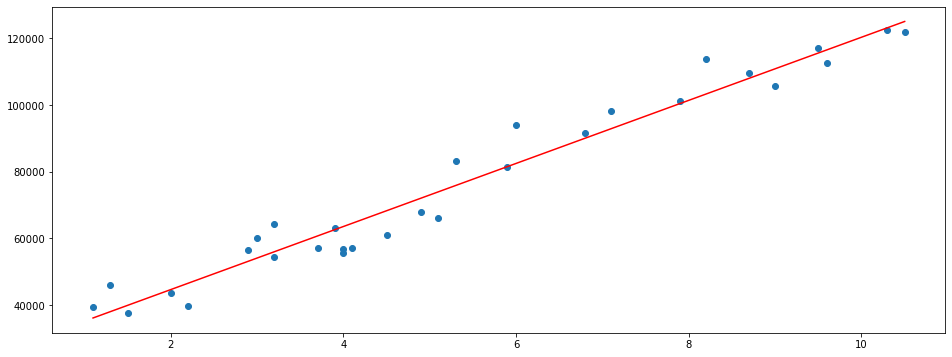

In [8]:
#plot
fig = plt.figure(figsize=(16,6))
plt.scatter(dataset.YearsExperience, dataset.Salary)
plt.plot(dataset.YearsExperience, reg_lin.predict(), color = "red")

In [10]:
reg_lin.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [9]:
#summary
reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        20:13:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Voltamos as 20:35

## Métricas de Regressões

Alguma das métricas que podemos utilizar para quantificar a acurácia do modelo, usamos por exemplo raiz quadrada da média dos erros quadráticos RMSE (*root mean squared error*), erro quadrático médio MSE (*mean squared error*) e o erro absoluto médio MAE (*mean absolute error*):<br><br>
$$
RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$

$$
MSE = {\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2}
$$

$$
MAE = {\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|}
$$

Outra medida importante é o **coeficiente de determinação $R^2$**, que mede a proporção da variabilidade em Y que pode ser explicada a partir de X.

$$R^2 = 1-\frac{\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}, \quad 0\leq R^2\leq 1$$

Entretanto essa é uma medida que precisa ser olhada com cautela dado que sempre aumenta a medida que incluímos variáveis no modelos, independentemente de explicar ou não a variável. Além disso ela pode aumentar ou diminuir de acordo com a amplitude de X.

Portanto surge o **coeficiente de determinação ajustado $\overline{R}^2$** dado por:

$$1-\dfrac{n-1}{n-2}(1-R^2)$$

#### Exemplo 2 - Scikit

In [12]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
# Importing the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
y_train

array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [18]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [21]:
dataset.Salary.values

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [23]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
regressor.intercept_

26777.39134119764

In [25]:
regressor.coef_

array([9360.26128619])

In [28]:
regressor.predict(X_train)

array([100723.45550213,  53922.14907116,  74514.72390079,  56730.22745702,
        68898.56712907, 103531.53388799,  90427.16808731,  38945.73101325,
       125060.13484623,  54858.17519978,  47369.96617082,  82002.93292974,
        82938.95905836,  61410.35810011,  56730.22745702, 111019.74291694,
        45497.91391358,  37073.67875601,  93235.24647317,  72642.67164355,
        64218.43648597])

In [30]:
y_train

array([101302.,  56642.,  66029.,  64445.,  61111., 113812.,  91738.,
        46205., 121872.,  60150.,  39891.,  81363.,  93940.,  57189.,
        54445., 105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [31]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [32]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088.])

In [37]:
#RMSE Teste
(np.mean((y_test - y_pred)**2))**0.5

4834.260936361728

In [43]:
#RMSE Treino
(np.mean((y_train - regressor.predict(X_train))**2))**0.5

5925.878216084145

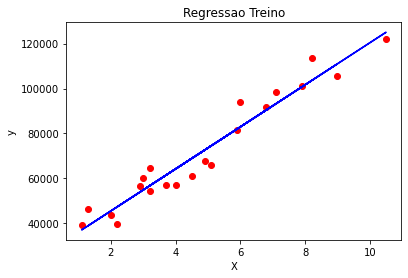

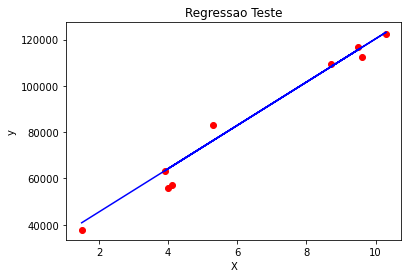

In [45]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "blue")
plt.title("Regressao Treino")
plt.ylabel("y")
plt.xlabel("X")
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "blue")
plt.title("Regressao Teste")
plt.ylabel("y")
plt.xlabel("X")
plt.show()

In [46]:
# intercepto (b0)
regressor.intercept_

26777.39134119764

In [47]:
#coefs (bis)
regressor.coef_

array([9360.26128619])

In [49]:
#metrics
from sklearn import metrics

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred)) #MSE
print(metrics.mean_squared_error(y_test, y_pred, squared=False)) #RMSE

0.9740993407213511
23370078.800832972
4834.260936361728


### <font color = red>Pressuposições **NECESSÁRIAS**</font>

- A relação entre Y e X é **linear**
- Os valores de X são fixos (ou controlados)
- A média do erro é nula, isto é, $E(\epsilon_i) = 0$
- É necessário haver **homocedasticidade de variância**, ou seja, para cada valor de X, a variância do erro $\epsilon_i$ é sempre $\sigma^2$. O que implica que $Var(Y_i) = \sigma^2$
- O erro de uma observação é independente do erro de outra observação, ou seja:
$$cov(\epsilon_i, \epsilon_i') = 0$$
- Os erros têm distribuição normal (necessário para testes de hipóteses e determinação de intervalo de confiânça)
$$\epsilon \sim N(0, \sigma^2)$$

Logo

$$Y\sim N(\beta_0 + \beta_1X, \sigma^2)$$

### Analise de resíduos

In [59]:
# erro
residuals = y_test - y_pred #real - predito
residuals

array([-3086.78327049,  -797.08258899, -8073.46261459,   -64.41035735,
        1269.12643996,  1219.33546892, -4000.89968866, -8424.43648597,
        6701.22384198])

In [57]:
# normalizado
std_residuals = (residuals - residuals.mean())/residuals.std()
std_residuals

array([-0.3073637 ,  0.19839403, -1.40884026,  0.36022943,  0.65478607,
        0.64378806, -0.50927719, -1.48636469,  1.85464825])

In [60]:
std_residuals.mean()

2.4671622769447922e-17

In [61]:
std_residuals.std()

0.9999999999999999

<AxesSubplot:ylabel='Density'>

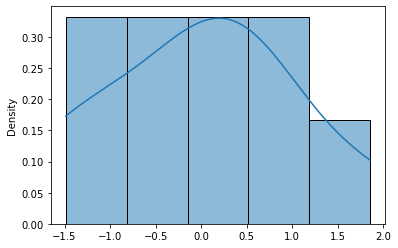

In [58]:
#hist
sns.histplot(std_residuals, kde = True, stat = "density")

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-1.60295378, -1.52216358, -0.57046037, -0.38748553,  0.16632327,
          0.31328192,  0.47381204,  0.62334163,  0.63738249,  1.8689219 ])),
 (1.1142537731980076, 1.966751709940856e-17, 0.9697834247313908))

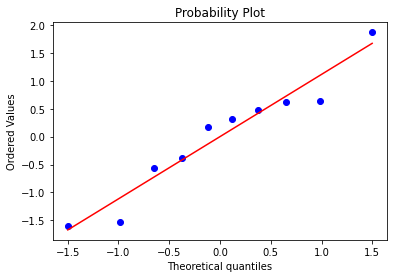

In [22]:
fig,ax = plt.subplots()
probplot(std_residuals, plot = ax, fit=True)

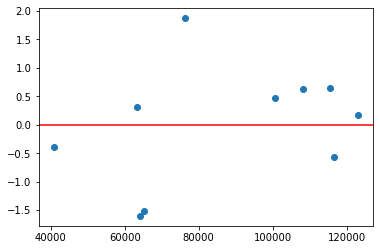

In [29]:
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')

#### ex didatico

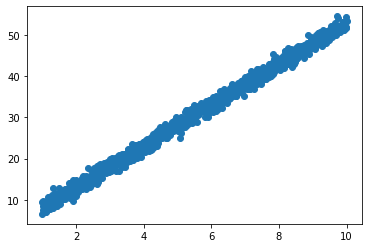

In [75]:
x = np.linspace(1,10,1000)
y = 3 + 5*x +np.random.normal(size = len(x))
plt.scatter(x,y)


In [76]:
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1), y)
y_pred = regressor.predict(x.reshape(-1, 1))
residuals = y-y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()

<AxesSubplot:ylabel='Density'>

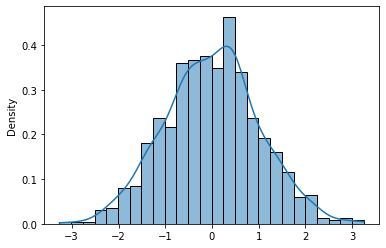

In [77]:
sns.histplot(std_residuals, kde = True, stat = "density")

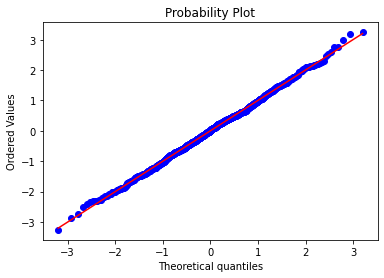

In [78]:
fig,ax = plt.subplots()
_,(_,_,_) = probplot(std_residuals, plot = ax, fit=True)

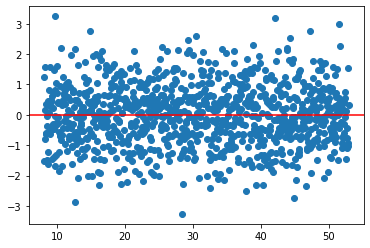

In [79]:
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')

In [80]:
metrics.mean_squared_error(y, y_pred, squared=False)

1.0219641588603479

## Regressão Polinomial

Notem que o modelo não precisa ter termos lineares em X, mas apenas nos parâmetros necessitam ser lineares. Por exemplo, modelo abaixo ainda é linear nos parâmetros: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_k x^k$$

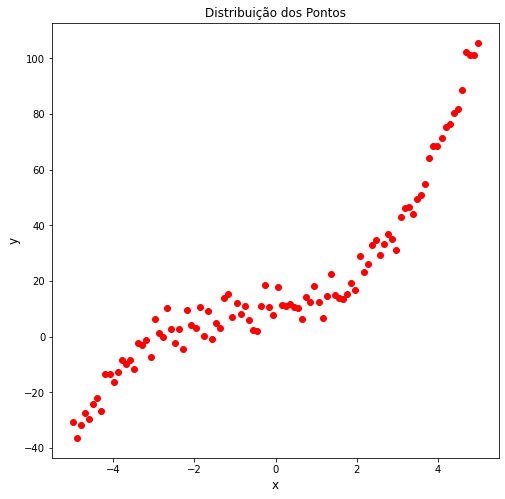

In [81]:
np.random.seed(7)
x = np.linspace(-5,5,100)
y = 10+ 2*x + x**2 + 0.5*x**3 + np.random.normal(0,4,size = len(x))

plt.figure(figsize=(8,8))
plt.plot(x, y, 'ro')
plt.title('Distribuição dos Pontos', fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlabel("x", fontsize=12)
plt.show()

In [83]:
#Dict polinomial
dt_dict = {"x":x, "x2":x**2, "x3":x**3, "x4":x**4}
pd.DataFrame(dt_dict)

,x,x2,x3,x4
0,-5.00000,25.000000,-125.000000,625.000000
1,-4.89899,24.000102,-117.576257,576.004897
2,-4.79798,23.020610,-110.452422,529.948491
3,-4.69697,22.061524,-103.622311,486.710856
4,-4.59596,21.122845,-97.079740,446.174564
...,...,...,...,...
95,4.59596,21.122845,97.079740,446.174564
96,4.69697,22.061524,103.622311,486.710856
97,4.79798,23.020610,110.452422,529.948491
98,4.89899,24.000102,117.576257,576.004897


In [84]:
# corr
pd.DataFrame(dt_dict).corr().round(2)

,x,x2,x3,x4
x,1.00,0.00,0.92,0.00
x2,0.00,1.00,0.00,0.96
x3,0.92,0.00,1.00,-0.00
x4,0.00,0.96,-0.00,1.00


In [102]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
tranformer = PolynomialFeatures(degree = 3, include_bias=False)
x = x.reshape((-1,1))

print(x)

tranformer.fit(x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
trans_x = tranformer.transform(x)
trans_x

[[-5.        ]
 [-4.8989899 ]
 [-4.7979798 ]
 [-4.6969697 ]
 [-4.5959596 ]
 [-4.49494949]
 [-4.39393939]
 [-4.29292929]
 [-4.19191919]
 [-4.09090909]
 [-3.98989899]
 [-3.88888889]
 [-3.78787879]
 [-3.68686869]
 [-3.58585859]
 [-3.48484848]
 [-3.38383838]
 [-3.28282828]
 [-3.18181818]
 [-3.08080808]
 [-2.97979798]
 [-2.87878788]
 [-2.77777778]
 [-2.67676768]
 [-2.57575758]
 [-2.47474747]
 [-2.37373737]
 [-2.27272727]
 [-2.17171717]
 [-2.07070707]
 [-1.96969697]
 [-1.86868687]
 [-1.76767677]
 [-1.66666667]
 [-1.56565657]
 [-1.46464646]
 [-1.36363636]
 [-1.26262626]
 [-1.16161616]
 [-1.06060606]
 [-0.95959596]
 [-0.85858586]
 [-0.75757576]
 [-0.65656566]
 [-0.55555556]
 [-0.45454545]
 [-0.35353535]
 [-0.25252525]
 [-0.15151515]
 [-0.05050505]
 [ 0.05050505]
 [ 0.15151515]
 [ 0.25252525]
 [ 0.35353535]
 [ 0.45454545]
 [ 0.55555556]
 [ 0.65656566]
 [ 0.75757576]
 [ 0.85858586]
 [ 0.95959596]
 [ 1.06060606]
 [ 1.16161616]
 [ 1.26262626]
 [ 1.36363636]
 [ 1.46464646]
 [ 1.56565657]
 [ 1.66666

array([[-5.00000000e+00,  2.50000000e+01, -1.25000000e+02],
       [-4.89898990e+00,  2.40001020e+01, -1.17576257e+02],
       [-4.79797980e+00,  2.30206101e+01, -1.10452422e+02],
       [-4.69696970e+00,  2.20615243e+01, -1.03622311e+02],
       [-4.59595960e+00,  2.11228446e+01, -9.70797404e+01],
       [-4.49494949e+00,  2.02045710e+01, -9.08185260e+01],
       [-4.39393939e+00,  1.93067034e+01, -8.48324846e+01],
       [-4.29292929e+00,  1.84292419e+01, -7.91154325e+01],
       [-4.19191919e+00,  1.75721865e+01, -7.36611859e+01],
       [-4.09090909e+00,  1.67355372e+01, -6.84635612e+01],
       [-3.98989899e+00,  1.59192939e+01, -6.35163748e+01],
       [-3.88888889e+00,  1.51234568e+01, -5.88134431e+01],
       [-3.78787879e+00,  1.43480257e+01, -5.43485822e+01],
       [-3.68686869e+00,  1.35930007e+01, -5.01156087e+01],
       [-3.58585859e+00,  1.28583818e+01, -4.61083388e+01],
       [-3.48484848e+00,  1.21441690e+01, -4.23205888e+01],
       [-3.38383838e+00,  1.14503622e+01

In [103]:
#Linear regression
model = LinearRegression()
model.fit(trans_x, y)
y_pred = model.predict(trans_x)
y_pred

array([-3.69908017e+01, -3.41553816e+01, -3.14463361e+01, -2.88606165e+01,
       -2.63951747e+01, -2.40469621e+01, -2.18129304e+01, -1.96900311e+01,
       -1.76752159e+01, -1.57654362e+01, -1.39576438e+01, -1.22487902e+01,
       -1.06358270e+01, -9.11570571e+00, -7.68537804e+00, -6.34179553e+00,
       -5.08190978e+00, -3.90267237e+00, -2.80103490e+00, -1.77394896e+00,
       -8.18366123e-01,  6.87620026e-02,  8.90483833e-01,  1.64984778e+00,
        2.34990224e+00,  2.99369564e+00,  3.58427639e+00,  4.12469288e+00,
        4.61799354e+00,  5.06722677e+00,  5.47544098e+00,  5.84568458e+00,
        6.18100599e+00,  6.48445360e+00,  6.75907584e+00,  7.00792110e+00,
        7.23403780e+00,  7.44047436e+00,  7.63027917e+00,  7.80650065e+00,
        7.97218721e+00,  8.13038726e+00,  8.28414921e+00,  8.43652146e+00,
        8.59055243e+00,  8.74929053e+00,  8.91578416e+00,  9.09308174e+00,
        9.28423168e+00,  9.49228238e+00,  9.72028226e+00,  9.97127972e+00,
        1.02483232e+01,  

In [104]:
print(model.intercept_)
print(model.coef_)

9.603598149399232
[2.25594132 1.052303   0.49297815]


In [105]:
metrics.mean_squared_error(y,y_pred, squared = False)

4.030011419242357

In [106]:
metrics.r2_score(y, y_pred)

0.9835725091942155

<AxesSubplot:ylabel='Density'>

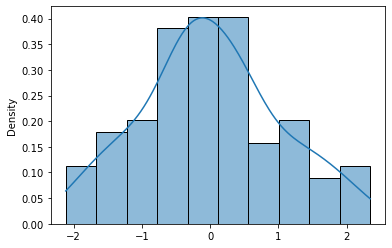

In [107]:
#residuos
residuals = y - y_pred
std_residuals = (residuals - residuals.mean())/residuals.std()
sns.histplot(std_residuals, kde = True, stat = "density")

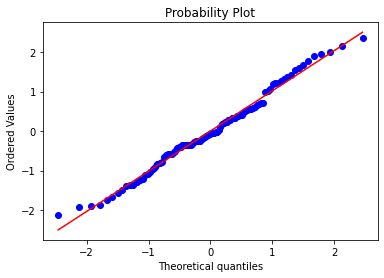

In [108]:
from scipy.stats import probplot
fig, ax = plt.subplots()
_,(_,_,_) = probplot(std_residuals, plot = ax, fit=True)

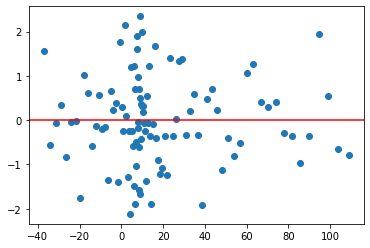

In [109]:
#scatter e line
plt.scatter(y_pred, std_residuals)
plt.axhline(y=0, color = "r")

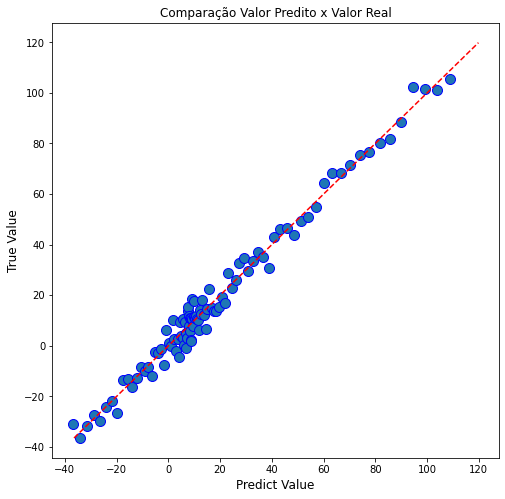

In [110]:
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

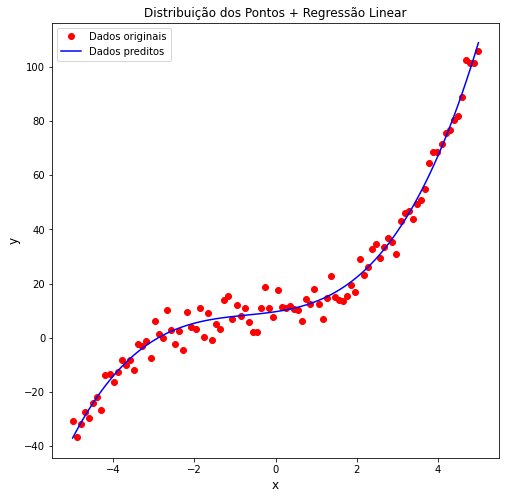

In [111]:
plt.figure(figsize=(8,8))
plt.plot(x,y, 'ro', label='Dados originais')
plt.plot(x,y_pred, 'b-', label = 'Dados preditos')
plt.title('Distribuição dos Pontos + Regressão Linear')
plt.ylabel("y", fontsize=12)
plt.xlabel("x", fontsize=12)
plt.legend()
plt.show()

## Regressão Linear Múltipla

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

#### Exemplo 3

Para o exemplo de Regressão Linear Múltipla, iremos utilizar o dataset *Car_Prices.csv*, onde o objetivo é estimar o preço dos carros a partir de suas características.

In [113]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [116]:
#Carregando o CSV
cars = pd.read_csv("../data/CarPrice.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Voltamos 20:32

In [119]:
# Algumas estatísticas interessantes sobre o dataset
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [121]:
# Por curiosidade, vamos ver como está os valores desses carros
cars[["car_ID", "price"]].sort_values("price")

,car_ID,price
138,139,5118.000
18,19,5151.000
50,51,5195.000
150,151,5348.000
76,77,5389.000
32,33,5399.000
89,90,5499.000
118,119,5572.000
21,22,5572.000
51,52,6095.000


<AxesSubplot:xlabel='price', ylabel='Count'>

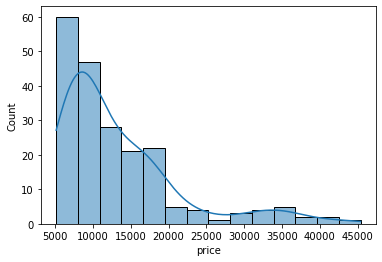

In [122]:
#
sns.histplot(cars.price, kde = True)

In [123]:
#Olhando os tipos de variáveis que temos na base
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [66]:
# Features categóricas ou em forma de string


Importante levantar que a regressão linear, seja ela simples ou múltipla, só suporta valores númericos. Dessa forma devemos tratar os dados categóricos da nossa base. Para isso vamos utilizar a função [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), onde esta função transforma as variáveis categóricas em diversas colunas no DataFrame para cada uma das opções de categoria:

In [125]:
cols = ['fueltype',
        'aspiration',
        'doornumber',
        'carbody', 
        'cylindernumber',
        'drivewheel',
        'enginelocation',
        'enginetype',
        'fuelsystem']

In [126]:
cars[cols]

,fueltype,aspiration,doornumber,carbody,cylindernumber,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,two,convertible,four,rwd,front,dohc,mpfi
1,gas,std,two,convertible,four,rwd,front,dohc,mpfi
2,gas,std,two,hatchback,six,rwd,front,ohcv,mpfi
3,gas,std,four,sedan,four,fwd,front,ohc,mpfi
4,gas,std,four,sedan,five,4wd,front,ohc,mpfi
5,gas,std,two,sedan,five,fwd,front,ohc,mpfi
6,gas,std,four,sedan,five,fwd,front,ohc,mpfi
7,gas,std,four,wagon,five,fwd,front,ohc,mpfi
8,gas,turbo,four,sedan,five,fwd,front,ohc,mpfi
9,gas,turbo,two,hatchback,five,4wd,front,ohc,mpfi


In [127]:
# dummies
cars_with_dummies = pd.get_dummies(cars, prefix_sep="_", columns=cols)

In [128]:
# Vamos dar uma olhada no que aconteceu com a base
cars_with_dummies.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [129]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Preparado a base, primeiro passo **importante** para podermos usar os dados no modelo é separar o dados em base de treino e teste (ou em alguns casos validação), onde a divisão fica da seguinte forma:
- **X :** todos os dados dispovínel sobre a dado que utilizamos exceto a resposta;
- **y :** Variável de resposta da nossa base.

In [130]:
#dummies
X = cars_with_dummies.drop(["car_ID", "symboling", "CarName","price"], axis = 1)
y = cars_with_dummies.price

In [132]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [133]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

Vamos utilizar para a separação da base em treino e teste a função [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), onde os parâmetros da função que mais iremos utlizar são:
- **test_size:** Defini a porcentagem que será separada para a base de teste;
- **random_state:** Seed de aleatoriadade, para garantir a reprodutibilidade.

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [137]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
116,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95,4150,28,33,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
94,94.5,165.3,63.8,54.5,1951,97,3.15,3.29,9.4,69,5200,31,37,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
36,96.5,157.1,63.9,58.3,2024,92,2.92,3.41,9.2,76,6000,30,34,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
85,96.3,172.4,65.4,51.6,2365,122,3.35,3.46,8.5,88,5000,25,32,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
181,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [138]:
y_train.head()

116    17950.0
94      7299.0
36      7295.0
85      6989.0
181    15750.0
Name: price, dtype: float64

In [21]:
#scaler

Para o caso da Regressão Linear Múltipla, iremos utilizar a biblioteca do Scikit-Learn chamada [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression):

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
# Instancia o modelo
linreg = LinearRegression()

In [141]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train, y_train)

LinearRegression()

In [142]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = linreg.predict(X_test)

In [143]:
y_pred

array([ 7291.46455578, 10384.81347401,  5177.96842876, 12041.65344705,
       11398.22319502,  7305.60828184, 18747.0319103 ,  6536.71669616,
       11234.32213178, 12489.00480324,  6560.367648  ,  4740.24211765,
        6662.00174774, 15114.42662927,  5773.70629647,  8301.68882779,
        5043.64885075, 16357.5975885 ,  6611.70266526, 10410.17816258,
       10153.32233312,  8371.80915749, 14042.61739252, 38340.58138445,
       17317.53126492, 20419.02682662, 10163.50742698, 16351.58126666,
       10185.64212845,  8903.98167002, 11426.97921048, 17211.43626469,
        7706.96312837, 11493.78858437, 38337.34145109, 12951.0713796 ,
       22157.24722026,  9598.4230555 , 14923.69898422,  8619.7674644 ,
        7575.27787236,  9283.99251878, 11725.82988541, 34028.        ,
       12724.8925144 ,  9066.6949505 ,  7291.09847349,  5990.78501827,
        7038.00583966,  9230.1556183 ,  5146.66082969, 20277.83427665,
        5043.64885075,  8636.70478933, 14684.84836312,  9816.01113481,
      

In [151]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

2963.757745052888

In [146]:
metrics.r2_score(y_test, y_pred)

0.8394134174546365

In [149]:
y.mean()

13276.710570731706

In [150]:
y.std()

7988.85233174315

In [155]:
rmse/y.std()

0.370986672675949

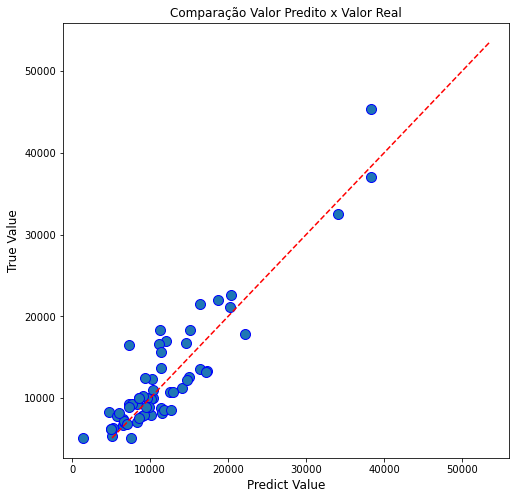

In [144]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

Vamos calcular o R2 para o modelo, importando a métrica [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) diretamente do Scikit_Learn.

In [25]:
from sklearn.metrics import r2_score

In [156]:
#intercept
linreg.intercept_

-20679.94338225708

In [158]:
#coef
linreg.coef_

array([-1.11042819e+02, -5.57307366e+01,  5.38078111e+02,  6.41387330e+01,
        6.39584210e+00,  1.20442282e+02,  8.62510548e+02, -5.08590795e+03,
       -8.36547254e+02,  1.10217383e+00,  2.12321709e+00,  5.87809934e+01,
        4.27080388e+01,  4.10644053e+03, -4.10644053e+03, -1.38236719e+03,
        1.38236719e+03, -3.51756731e+02,  3.51756731e+02,  2.22741956e+03,
       -1.80050484e+03, -7.83244840e+02,  9.54156321e+02, -5.97826195e+02,
        7.47302837e+03, -2.83751432e+03, -4.58618844e+03,  2.82666605e+02,
       -4.54747351e-12, -3.04263496e+03,  2.71064275e+03,  2.76751644e+02,
        6.19908989e+02, -8.96660633e+02, -4.71139969e+03,  4.71139969e+03,
        1.69132824e+03, -5.90015003e+03,  1.38579499e+03,  5.08636249e+03,
        1.57288954e+03, -6.54686798e+03,  2.71064275e+03,  8.09459814e+02,
        6.46257467e+02,  2.71064275e+03,  4.10644053e+03, -5.30155855e+03,
        6.97512181e+02, -3.66875419e+03,  0.00000000e+00])

In [125]:
coefs = linreg.coef_

list_columns = X.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Vars': list_feature,
              'Coefs': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Coefs'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

,Vars,Coefs
0,enginesize,4.874075e+03
1,curbweight,1.975502e+03
2,carwidth,1.357716e+03
3,cylindernumber_eight,1.194295e+03
4,peakrpm,9.293967e+02
5,enginetype_ohc,9.009478e+02
6,highwaympg,5.827646e+02
7,enginelocation_rear,4.983105e+02
8,carbody_convertible,4.215010e+02
9,cylindernumber_two,3.931095e+02


## Links, Artigos e Referências:

- [Scikit-Learn](https://scikit-learn.org/stable/index.html), Documentação do Scikit-Learn;
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), Documentação da Regressão Linear;
- [Linear Regression - Detailed View](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86), artigo publicado pelo Towards Data Science.